In [47]:
import numpy as np

In [48]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt

In [50]:
#create our own dataset of scattered points

In [51]:
from sklearn.datasets import make_blobs

In [52]:
X,y=make_blobs(n_samples=500,centers=5,n_features=2,random_state=3) #random_state keeps the random value constant
                                                                    #n_features indicates the dimentionality or attributes 
                                                                    #for the sample points
                                                                    #X holds all the dimentionalities of ponits, y holds labels

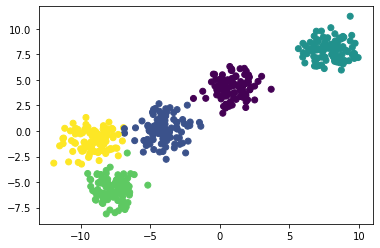

In [53]:
plt.scatter(X[:,0],X[:,1],c=y)   # this is how the output should look

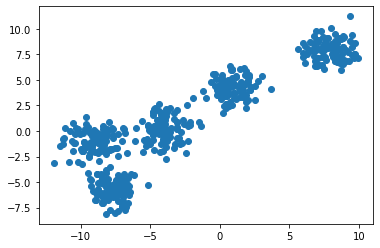

In [54]:
plt.scatter(X[:,0],X[:,1])   #this is the actual sample input(without classification of clusters)

In [56]:
k=5    #no of clusters
color=["green","red","blue","orange","yellow"]     # keys to tell which point belonga to which cluster
cluster={}
np.random.seed(3)   # so that iterations work on and improove upon the same intitial data set
for i in range(k):
    center=10*((2*np.random.random(2,))-1)
    point=[]
    clust={
        'center':center,
        'points':point,
        'color':color[i]   # to give our own colors
    }
    cluster[i]=clust
print(cluster)

    
    

{0: {'center': array([1.01595805, 4.16295645]), 'points': [], 'color': 'green'}, 1: {'center': array([-4.18190522,  0.2165521 ]), 'points': [], 'color': 'red'}, 2: {'center': array([7.85893909, 7.92586178]), 'points': [], 'color': 'blue'}, 3: {'center': array([-7.48829379, -5.85514244]), 'points': [], 'color': 'orange'}, 4: {'center': array([-8.97065593, -1.18380313]), 'points': [], 'color': 'yellow'}}


In [57]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

    

In [58]:
def assignPointsToCluster(cluster):
    for i in range(X.shape[0]):
        dist=[]
        curr=X[i]    # current location of the point, i.e ,the ith row
        for kx in range(k):
            d=distance(curr,cluster[kx]["center"])
            dist.append(d)
        current_cluster=np.argmin(dist)   # to get the index of the cluster center to which the point is nearest to
        cluster[current_cluster]["points"].append(curr)   # to add the point to the nearest cluster
        

In [59]:
def updateCluster(cluster):
    for kx in range(k):
        pts=np.array(cluster[kx]["points"])  # takes all points from cluster kx
        new_u=pts.mean(axis=0)  # to find mean of all the points of cluster kx
        cluster[kx]["center"]=new_u    # shifts the position
        cluster[kx]["points"]=[]    # so that the cluster can be reformed for the next iteration
        

In [60]:
def plotcluster(cluster):
    for kx in range(k):
        pts=np.array(cluster[kx]["points"])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=cluster[kx]["color"])
        except:
            pass
        uk=cluster[kx]["center"]
        plt.scatter(uk[0],uk[1],color="black",marker="*")
    print(pts.shape[0])
            

103


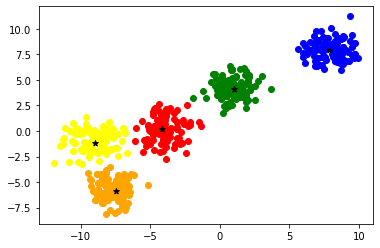

In [61]:
assignPointsToCluster(cluster)
plotcluster(cluster)
updateCluster(cluster)